In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


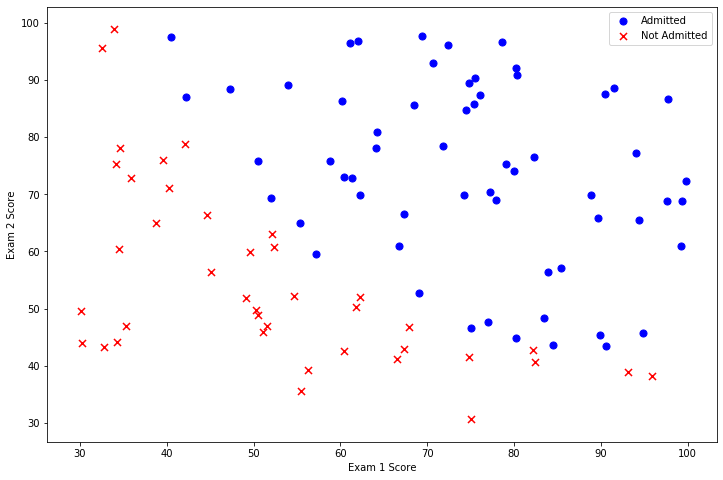

In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [5]:
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def ComputeCost(X, y, theta):
    term1 = np.multiply(-y, np.log(Sigmoid(X * theta.T)))
    term2 = np.multiply((1 - y), np.log(1 - Sigmoid(X * theta.T)))
    return np.sum(term1 - term2) / len(X)

In [7]:
def GradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    costs = np.zeros(iters)
    for i in range(iters):
        term1 = Sigmoid(X * theta.T) - y
        for j in range(parameters):
            term2 = np.multiply(term1, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term2))
        theta = temp
        costs[i] = ComputeCost(X, y, theta)
    return theta, costs

In [8]:
data.insert(0, 'theta0', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(theta)
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [9]:
alpha = 0.001
iters = 150000
theta, cost = GradientDescent(X, y, theta, alpha, iters)
theta, cost

(matrix([[-6.28026563,  0.05646576,  0.04975402]]),
 array([0.69829069, 0.65971176, 0.66162727, ..., 0.34402668, 0.34402601,
        0.34402534]))

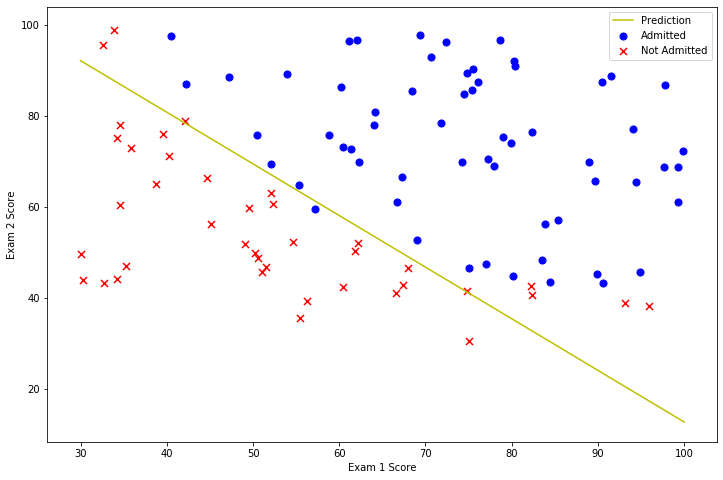

In [10]:
plotting_x1 = np.linspace(30, 100)
plotting_h1 = ( - theta[0,0] - theta[0,1] * plotting_x1) / theta[0,2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()